In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import geopandas as gpd

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

In [2]:
df = pd.read_csv("/kaggle/input/usa-real-estate-dataset/realtor-data.zip.csv")

In [3]:
df.head(5)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [4]:
df.tail(5)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24
2226381,108243.0,sold,580000.0,5.0,3.0,0.31,307704.0,Richland,Washington,99354.0,3615.0,2022-03-23


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [6]:
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

# Data Cleaning

## Data Type Conversion

In [7]:
df.dtypes

brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
dtype: object

Since the 'prev_sold_date' column is saved as an object, we should try to convert it to datetime data type

In [8]:
# df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'])
# after trying to convert, got an error about a date out of bounds: '3019-04-02'
# this is probably an error and was meant to be 2019-04-02

# find the bad date index
df[(df['prev_sold_date']=='3019-04-02')]

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1474557,89918.0,sold,325000.0,2.0,2.0,NaN,598435.0,Long Beach,New York,11561.0,1012.0,3019-04-02


In [9]:
# find the bad date index
bad_date_index = df[(df['prev_sold_date']=='3019-04-02')].index
bad_date_index
# rewrite using .loc
df.loc[bad_date_index, 'prev_sold_date'] = '2019-04-02'

In [10]:
# check if gone
df[(df['prev_sold_date']=='3019-04-02')]

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date


In [11]:
# convert 'prev_sold_date' to datetime
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'])

In [12]:
df.dtypes

brokered_by              float64
status                    object
price                    float64
bed                      float64
bath                     float64
acre_lot                 float64
street                   float64
city                      object
state                     object
zip_code                 float64
house_size               float64
prev_sold_date    datetime64[ns]
dtype: object

In [13]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaT
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaT
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaT
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaT
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaT


In [14]:
df.shape

(2226382, 12)

There are 2,226,382 rows and 15 columns


## Missing Values

In [15]:
# check missing values
(df.isna().mean()*100)

brokered_by        0.203604
status             0.000000
price              0.069215
bed               21.618797
bath              22.986666
acre_lot          14.624130
street             0.488056
city               0.063197
state              0.000359
zip_code           0.013430
house_size        25.533983
prev_sold_date    32.981627
dtype: float64

A significant portion of the data in the 'bed', 'bath', 'acre_lot', 'house_size' and 'prev_sold_date' columns are NaN. We will fill the NaN values in the 'bed', 'bath', 'acre_lot' and 'house_size' columns with their respective mean or median values, while 'prev_sold_date' will stay NaT (Not a Time).

In [16]:
df['bed'] = pd.to_numeric(df['bed'], errors='coerce')
df['bed'] = df['bed'].fillna(df['bed'].median())
df['bath'] = df['bath'].fillna(df['bath'].median())
df['acre_lot'] = df['acre_lot'].fillna(df['acre_lot'].mean())
df['house_size'] = df['house_size'].fillna(df['house_size'].mean())

The missing data in the 'brokered_by', 'price', 'street', 'state', 'zip_code' and 'city' columns is minimal, with each column having less than or equal to 0.5% missing values. Removing these rows will hardly affect the analysis.

In [17]:
df.dropna(subset=['brokered_by', 'price', 'street', 'city', 'state', 'zip_code'], inplace=True)

In [18]:
# check
(df.isna().mean()*100).round()

brokered_by        0.0
status             0.0
price              0.0
bed                0.0
bath               0.0
acre_lot           0.0
street             0.0
city               0.0
state              0.0
zip_code           0.0
house_size         0.0
prev_sold_date    33.0
dtype: float64

## Duplicates

In [19]:
# checking for duplicates

print(f'Amount of duplicates: {df.duplicated().sum()}')
print(f"Percentage of duplicates: {(df.duplicated().mean()*100).round(3)}")

Amount of duplicates: 24
Percentage of duplicates: 0.001


With only 24 duplicates in a dataset of 2 million rows, less than 0.001% of the data is affected. Removing these duplicates should not have impact on the analysis.

In [20]:
# removing duplicates
df.drop_duplicates(inplace=True)
print(f'Amount of duplicates: {df.duplicated().sum()}')


Amount of duplicates: 0


## Outliers

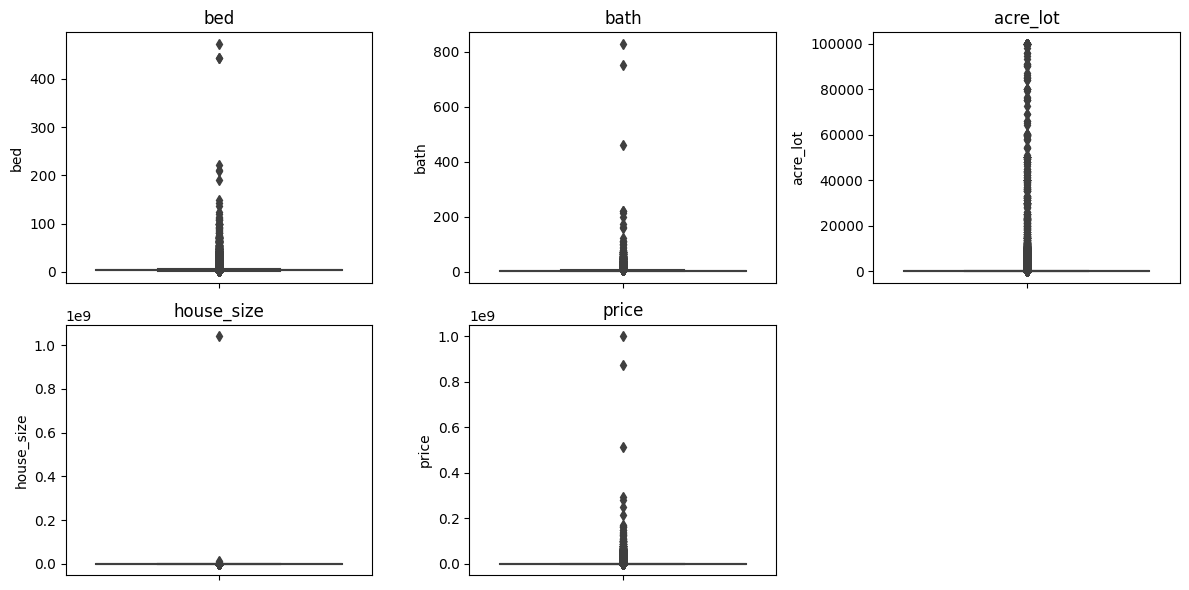

In [21]:
# check for outliers in numerical columns

numerical_columns = ['bed', 'bath', 'acre_lot', 'house_size', 'price']

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

In [22]:
# Calculate z-scores for numerical columns
z_scores = stats.zscore(df[['bed', 'bath', 'acre_lot', 'house_size', 'price']])
abs_z_scores = np.abs(z_scores)

# Identify outliers based on z-score threshold
outliers = (abs_z_scores > 3).any(axis=1) 

# Filter DataFrame to include only rows with outliers
df_outliers = df[outliers]

In [23]:
# find percentage of outliers
percentage_of_outliers = (len(df_outliers) / len(df))
print(f"Proportion of outliers is approximately: {round(percentage_of_outliers, 3)}")

Proportion of outliers is approximately: 0.016


Given that outliers represent less than 2% of the dataset, I've decided to remove them.

In [24]:
df.drop(df_outliers.index, inplace=True)

# Visualization

In [25]:
custom_colors = [
    '#e5c3c6',  
    '#cad2a7',  
    '#f96161', 
    '#bcd2d0',  
    '#d0b783',  
    '#a3d2ca',  
    '#f2b8ff',     
]

In [26]:
# isolate numerical columns for easier access when plotting correlation map
df_numerical = df[numerical_columns]

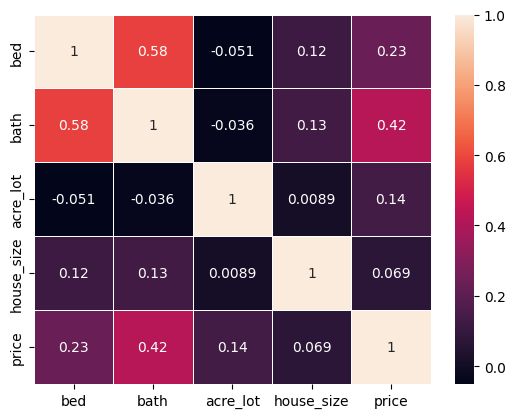

In [27]:
sns.heatmap(df_numerical.corr(), annot=True, linewidths=0.5);

The number of bedrooms and bathrooms are highly correlated with each other, indicating a strong relationship between these two features. Both bedrooms and bathrooms also exhibit individual correlations with the price of the property, suggesting that they contribute to determining the price.

In [28]:
df.sort_values(['price'], ascending=False)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
650975,98093.0,for_sale,5232000.0,3.0,2.0,654.000000,1893761.0,Hattiesburg,Mississippi,39401.0,2714.471335,NaT
989145,52840.0,for_sale,5227280.0,3.0,2.0,14.480000,1461288.0,Springdale,Arkansas,72762.0,2714.471335,2004-12-13
1210231,107335.0,for_sale,5227200.0,3.0,2.0,6.000000,792363.0,Buckeye,Arizona,85326.0,2714.471335,NaT
1069693,5629.0,for_sale,5227200.0,3.0,2.0,80.000000,1892660.0,Cleveland,Texas,77328.0,2714.471335,NaT
1120081,86015.0,for_sale,5227200.0,3.0,2.0,29.980000,1185197.0,Dripping Springs,Texas,78620.0,2714.471335,2011-05-13
...,...,...,...,...,...,...,...,...,...,...,...,...
1246904,91026.0,ready_to_build,0.0,2.0,2.0,15.223027,1190217.0,Las Vegas,Nevada,89135.0,1776.000000,NaT
1176541,46047.0,ready_to_build,0.0,3.0,2.0,15.223027,1135405.0,Nampa,Idaho,83686.0,2431.000000,NaT
1176540,46047.0,ready_to_build,0.0,3.0,2.0,15.223027,1135405.0,Nampa,Idaho,83686.0,2010.000000,NaT
1176539,46047.0,ready_to_build,0.0,3.0,2.0,15.223027,1135405.0,Nampa,Idaho,83686.0,1888.000000,NaT


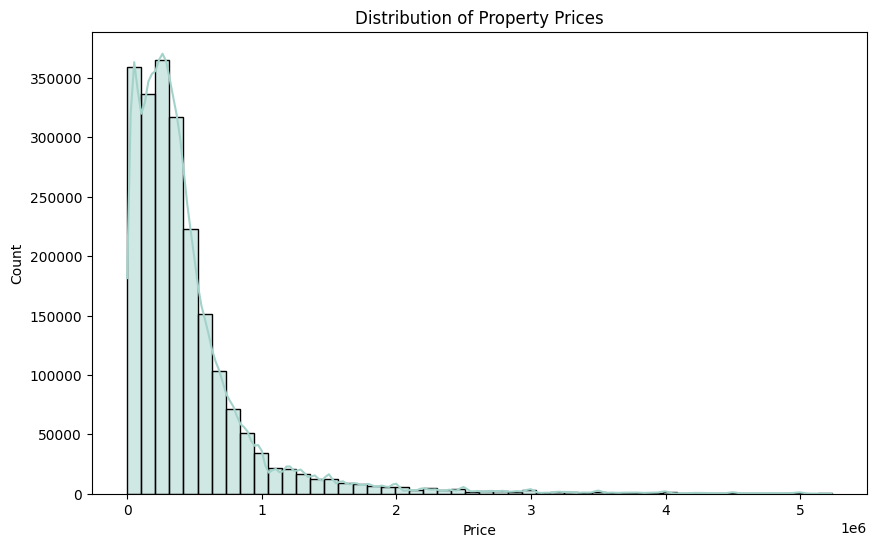

In [29]:
# Distribution of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='#a3d2ca')
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

Price is distributed in millions (1e6)

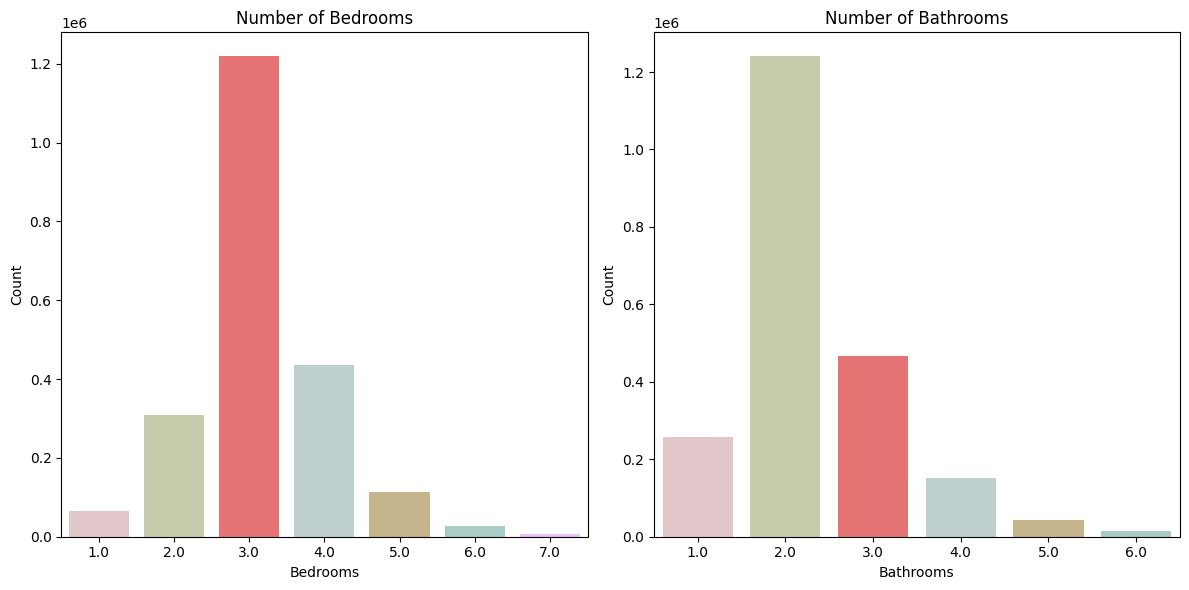

In [30]:
plt.figure(figsize=(12, 6))
# Plot number of bedrooms
plt.subplot(1, 2, 1)  # (rows, columns, index)
sns.countplot(data=df, x='bed', palette=custom_colors)
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')

# Plot number of bathrooms
plt.subplot(1, 2, 2)  # (rows, columns, index)
sns.countplot(data=df, x='bath', palette=custom_colors)
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [31]:
top_10_cities=df['city'].value_counts().head(10)
top_10_states=df['state'].value_counts().head(10)

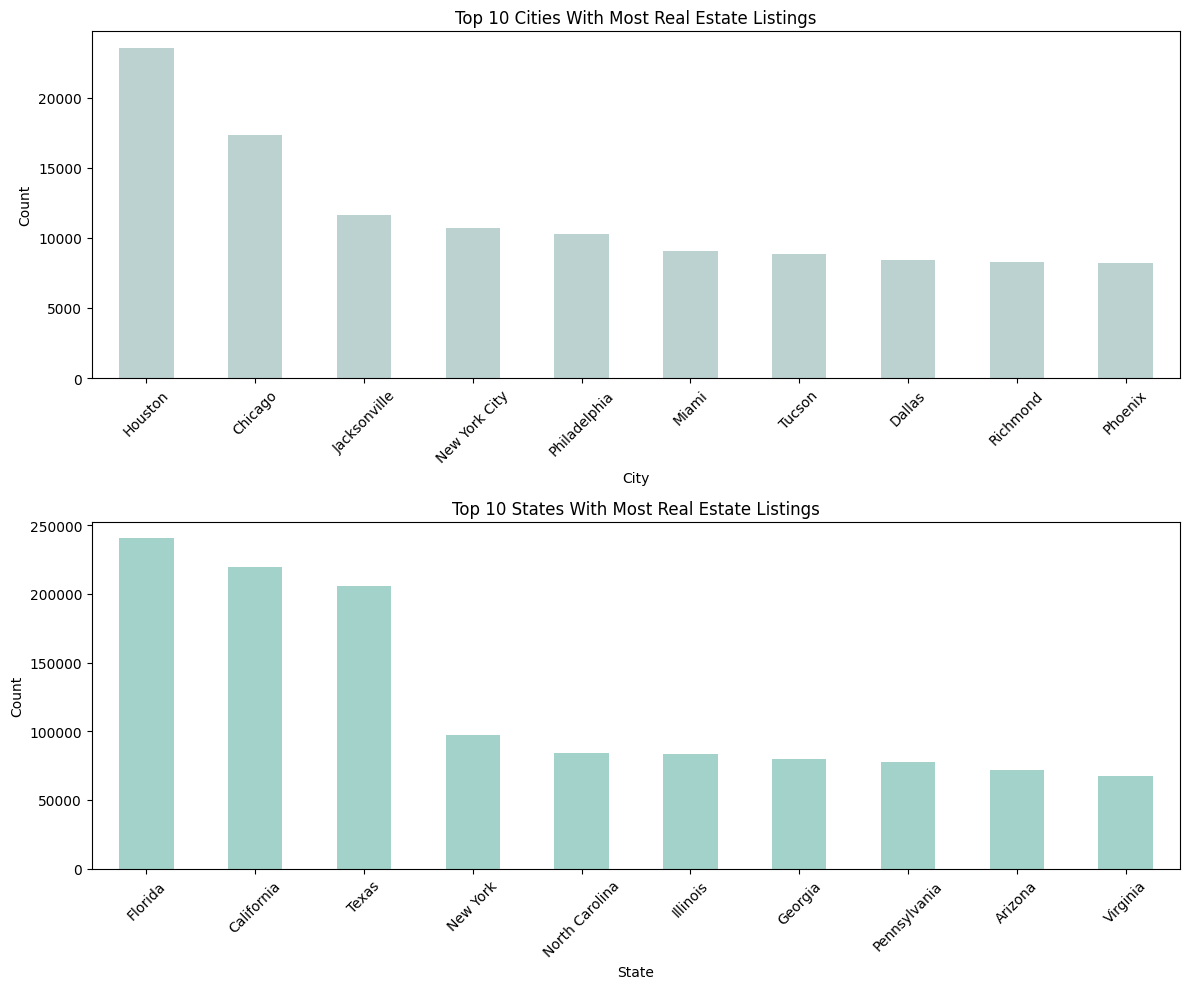

In [32]:
plt.figure(figsize=(12, 10))

# Plot the top 10 cities
plt.subplot(2, 1, 1)  # (rows, columns, index)
top_10_cities.plot(kind='bar', color='#bcd2d0')
plt.title('Top 10 Cities With Most Real Estate Listings')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot the top 10 states
plt.subplot(2, 1, 2)  # (rows, columns, index)
top_10_states.plot(kind='bar', color='#a3d2ca')
plt.title('Top 10 States With Most Real Estate Listings')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

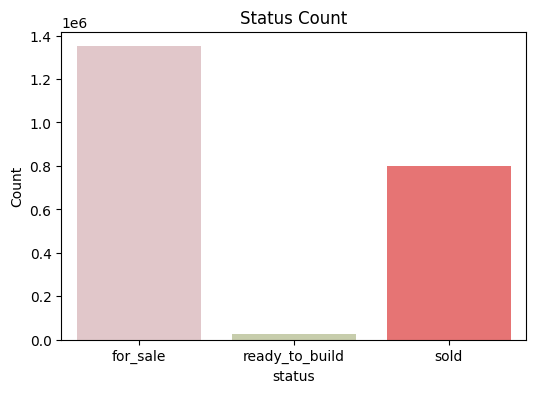

In [33]:
plt.figure(figsize=(6, 4))

sns.countplot(data = df, x='status', palette=custom_colors)
plt.ylabel("Count")
plt.title('Status Count')
plt.show()

In [34]:
df_year_sold = df['prev_sold_date'].dt.year.to_frame(name='year_sold')
df_year_sold.dropna(inplace=True)
year_counts = df_year_sold['year_sold'].value_counts().sort_index()


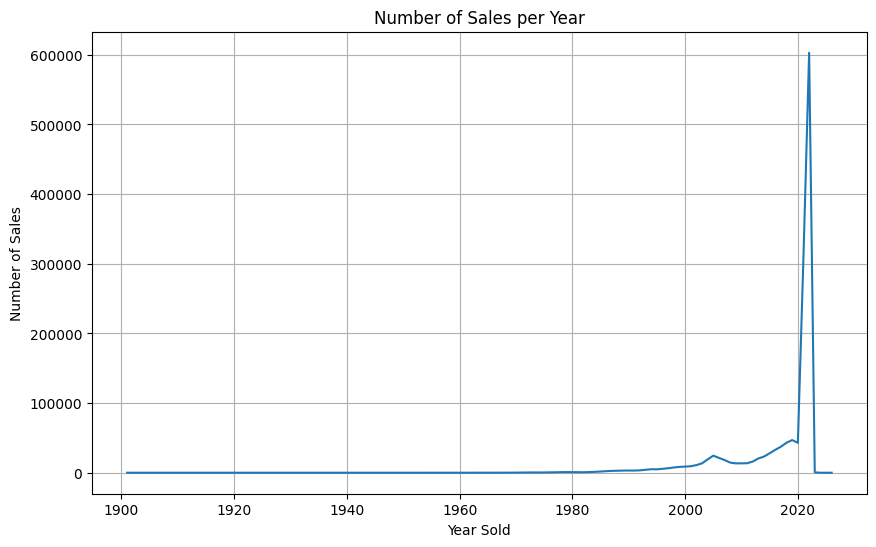

In [35]:
year_counts.plot(kind='line', figsize=(10, 6))
plt.title('Number of Sales per Year')
plt.xlabel('Year Sold')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.show()

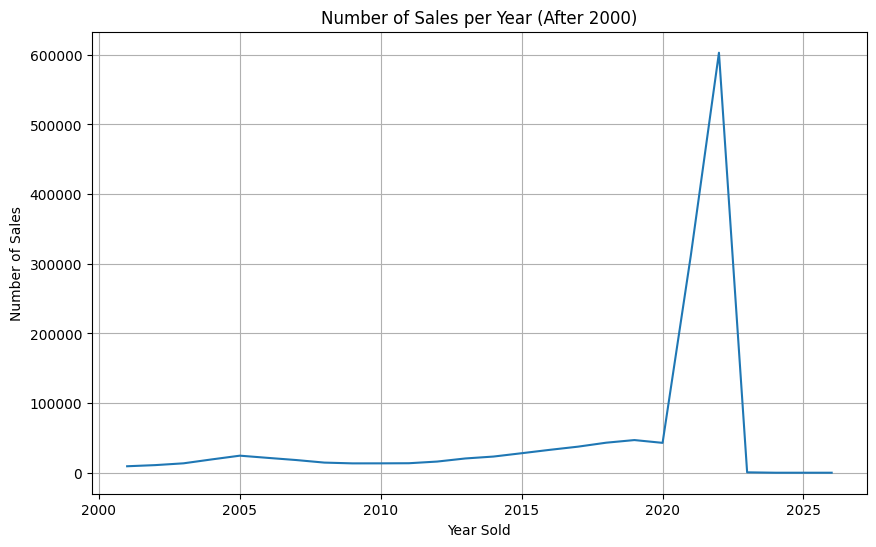

In [36]:
df_after_2000 = df_year_sold[df_year_sold['year_sold'] > 2000]
year_counts_after_2000 = df_after_2000['year_sold'].value_counts().sort_index()

# Plot the line plot
year_counts_after_2000.plot(kind='line', figsize=(10, 6))
plt.title('Number of Sales per Year (After 2000)')
plt.xlabel('Year Sold')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.show()

In [37]:
for_sale_df = df[df['status'] == 'for_sale']
top_10_city_sale_counts = for_sale_df['city'].value_counts().head(10)

sold_df = df[df['status'] == 'sold']
top_10_city_sold_counts = sold_df['city'].value_counts().head(10)

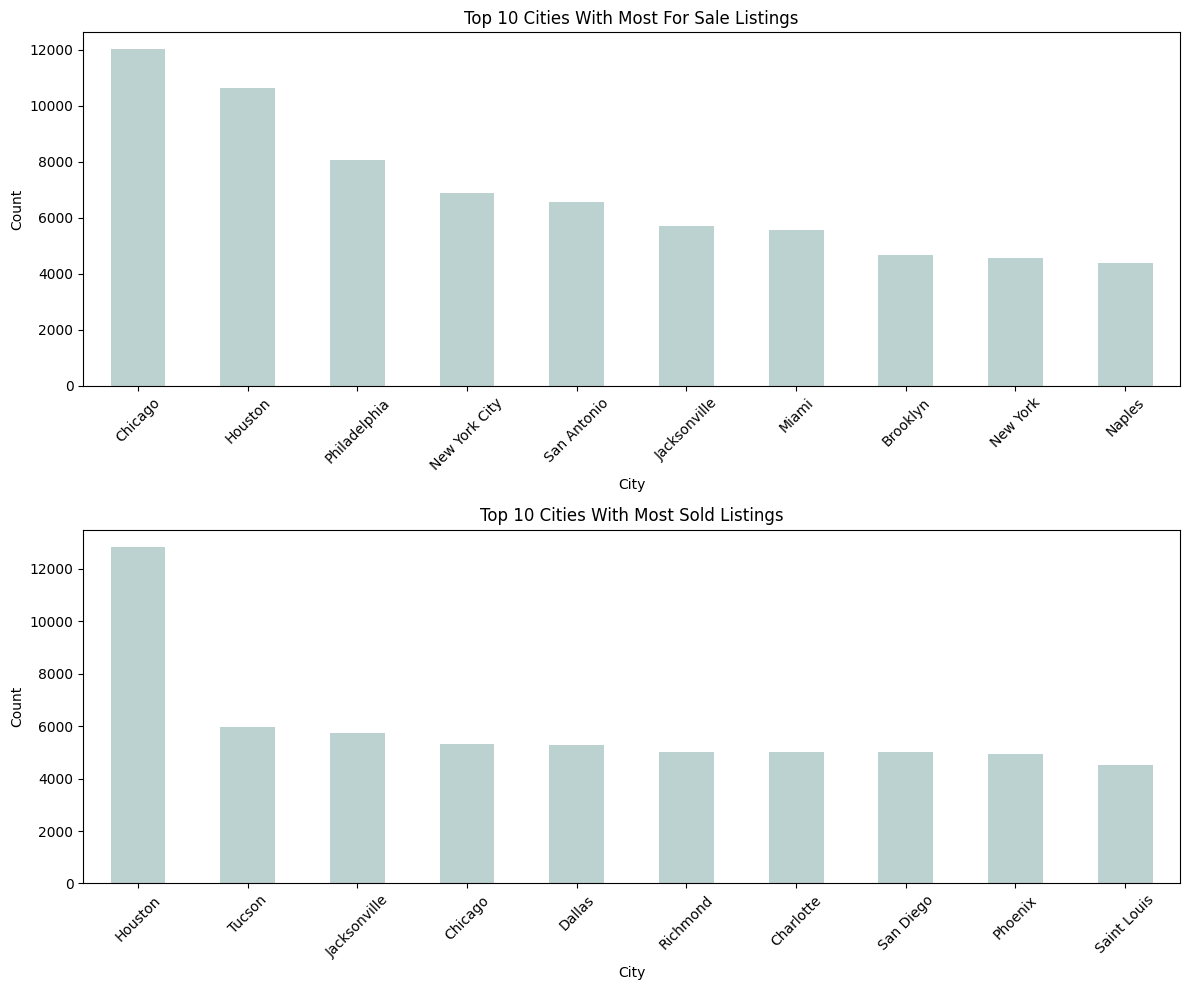

In [38]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)  # (rows, columns, index)
top_10_city_sale_counts.plot(kind='bar', color='#bcd2d0')
plt.title('Top 10 Cities With Most For Sale Listings')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)  # (rows, columns, index)
top_10_city_sold_counts.plot(kind='bar', color='#bcd2d0')
plt.title('Top 10 Cities With Most Sold Listings')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [39]:
top_10_state_sale_counts = for_sale_df['state'].value_counts().head(10)
top_10_state_sold_counts = sold_df['state'].value_counts().head(10)

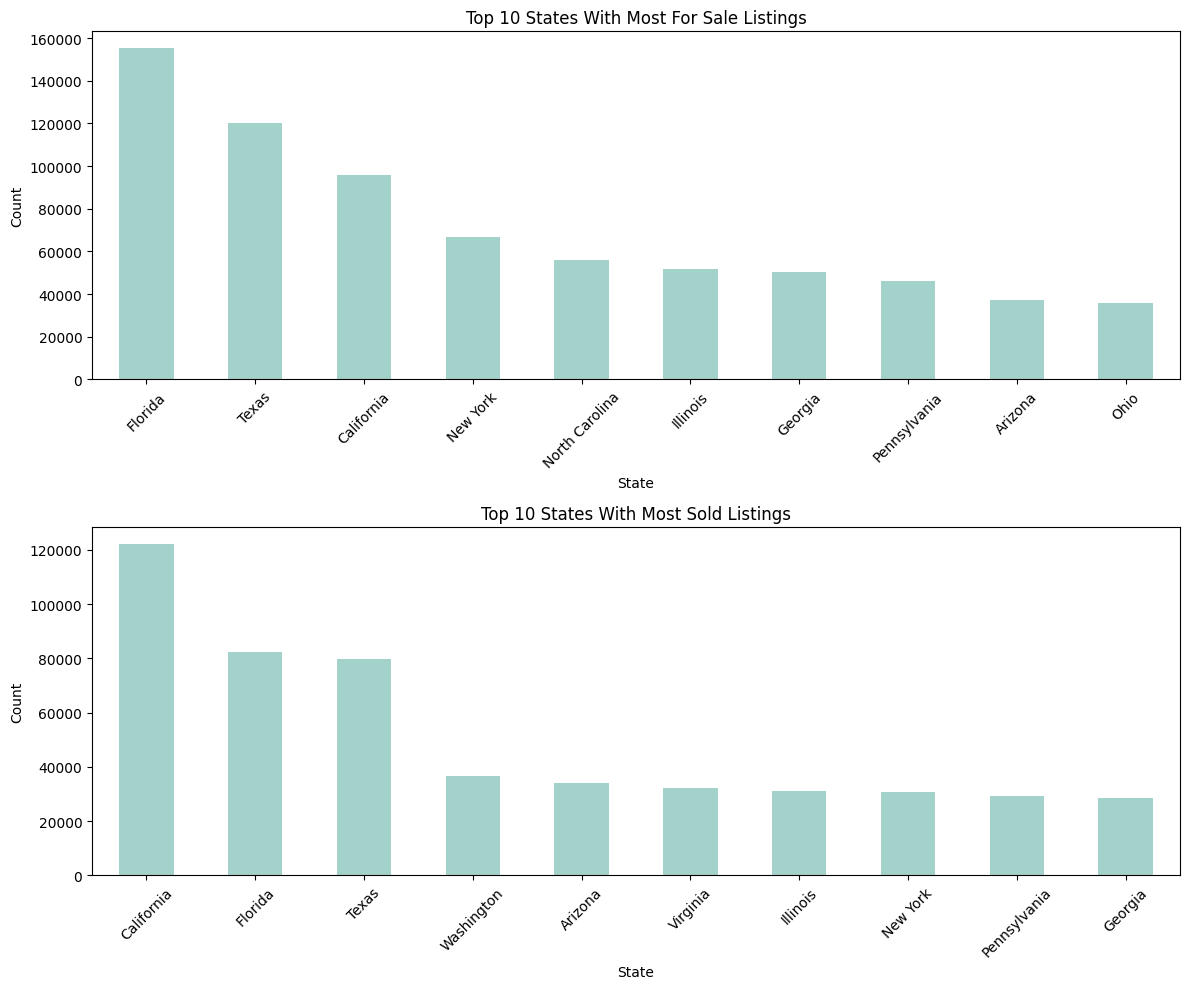

In [40]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)  # (rows, columns, index)
top_10_state_sale_counts.plot(kind='bar', color='#a3d2ca')
plt.title('Top 10 States With Most For Sale Listings')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)  # (rows, columns, index)
top_10_state_sold_counts.plot(kind='bar', color='#a3d2ca')
plt.title('Top 10 States With Most Sold Listings')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

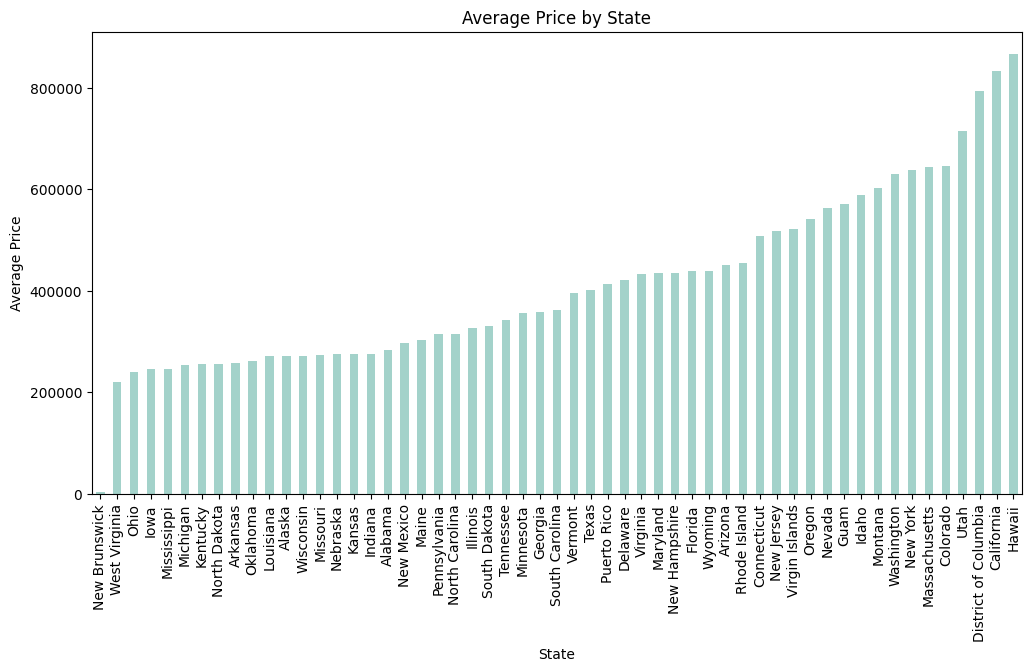

In [41]:
average_price_per_state = df.groupby('state')['price'].mean().sort_values()

plt.figure(figsize=(12, 6))
average_price_per_state.plot(kind='bar', color='#a3d2ca')
plt.title('Average Price by State')
plt.xlabel('State')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

In [42]:
average_price_per_city = df.groupby('city')['price'].mean().sort_values()
top_50_expensive_cities = average_price_per_city.tail(50)

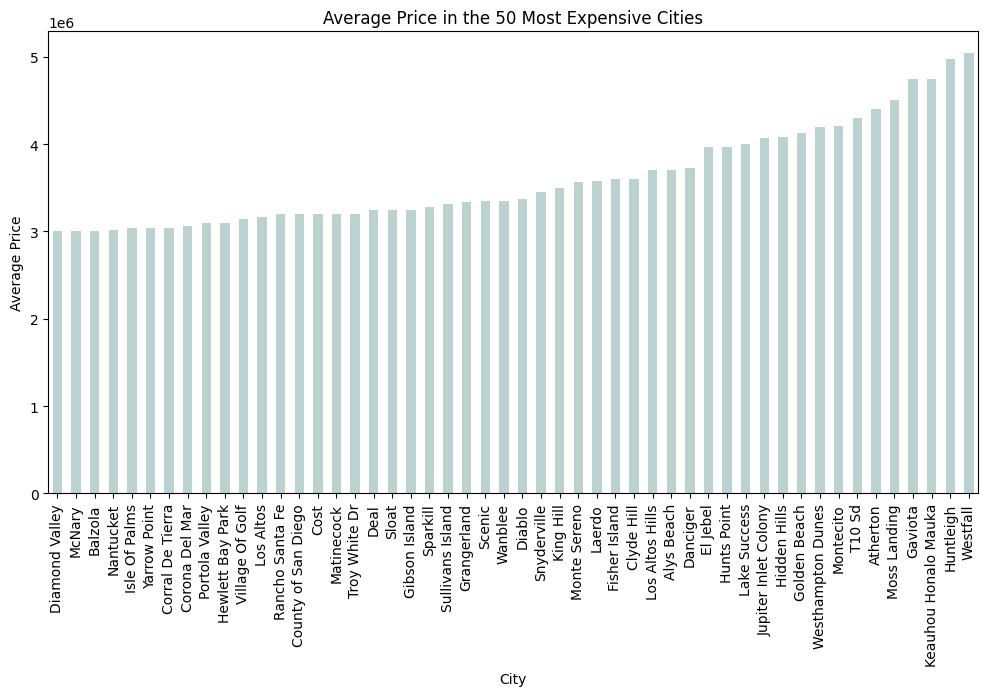

In [43]:
plt.figure(figsize=(12, 6))
top_50_expensive_cities.plot(kind='bar', color='#bcd2d0')
plt.title('Average Price in the 50 Most Expensive Cities')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


# Linear Regression Model

In [44]:
df_copy = df.copy()

columns_to_remove = ['status', 'brokered_by', 'city', 'state', 'prev_sold_date', 'street', 'zip_code']
df_copy.drop(columns=columns_to_remove, inplace=True)

In [45]:
df_copy

,price,bed,bath,acre_lot,house_size
0,105000.0,3.0,2.0,0.12,920.000000
1,80000.0,4.0,2.0,0.08,1527.000000
2,67000.0,2.0,1.0,0.15,748.000000
3,145000.0,4.0,2.0,0.10,1800.000000
4,65000.0,6.0,2.0,0.05,2714.471335
...,...,...,...,...,...
2226377,359900.0,4.0,2.0,0.33,3600.000000
2226378,350000.0,3.0,2.0,0.10,1616.000000
2226379,440000.0,6.0,3.0,0.50,3200.000000
2226380,179900.0,2.0,1.0,0.09,933.000000


In [46]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

train_data = df_copy
X = train_data.drop(['price'], axis=1)
y = train_data['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [47]:
regr.score(X_test,y_test)

0.20146075882936265

R-squared of 0.20269644762208916 indicates that approximately 20.27% of the variance in the dependent variable ('price' or y) can be explained by the independent variables (X) in this model

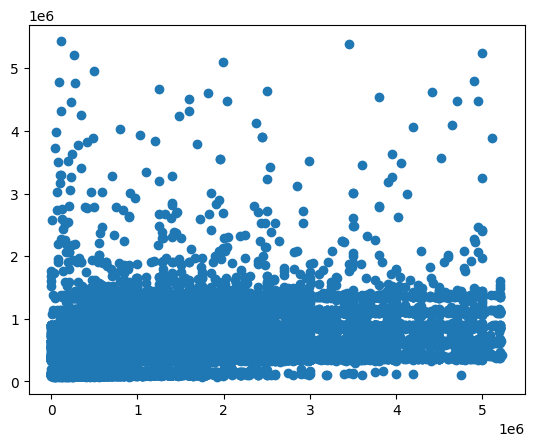

In [48]:
y_predicted = regr.predict(X_test)
plt.scatter(y_test,y_predicted)
plt.show()